In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import utils as ut
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
def get_sa_data_soilc_all(path):
    params='sample_matrix.csv'
    model='results.csv'
    df_model = pd.read_csv(path+model,header=None)
    output_name = ['NPP0','NPP1','NPP2','NPP3',\
                  'VEGC00','VEGC01','VEGC02','VEGC03','VEGC10','VEGC11','VEGC12',\
                  'VEGC20','VEGC21','VEGC22', \
                  'VEGN00','VEGN01','VEGN02','VEGN03','VEGN10','VEGN11','VEGN12',\
                  'VEGN20','VEGN21','VEGN22', 'CarbonShallow', 'CarbonDeep', \
                  'CarbonMineralSum', 'AvailableNitrogenSum']
    df_model.columns = output_name

    df_param = pd.read_csv(path+params)
    return df_param,df_model

[df_param,df_model]=\
get_sa_data_soilc_all('data/STEP4-MD1-NPPVEGCVEGN-soil/')

## SA STEP4 SoilC (+-.75)

In [3]:
[df_param,df_model]=get_sa_data_soilc_all('data/STEP4-MD1-NPPVEGCVEGN-soil/')

In [4]:
cat data/STEP4-MD1-NPPVEGCVEGN-soil/param_props.csv

name,bounds,initial,cmtnum,pftnum
micbnup,"[0.112375, 0.786625]",0.4495,1,None
kdcrawc,"[0.15849999999999997, 1.1095000000000002]",0.634,1,None
kdcsoma,"[0.135, 0.9450000000000001]",0.54,1,None
kdcsompr,"[0.0005, 0.0035]",0.002,1,None
kdcsomcr,"[1.75e-05, 0.0001225]",7e-05,1,None


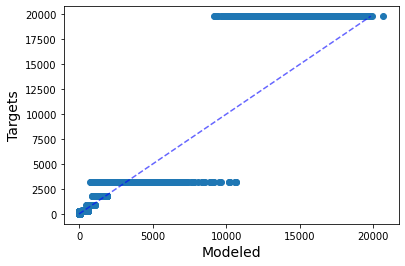

In [5]:
ut.one_to_one_match_plot(df_model)

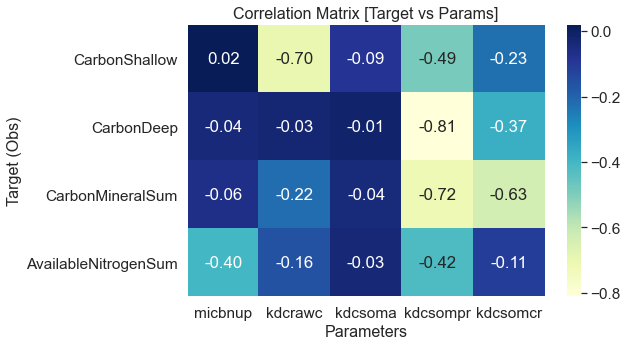

In [6]:
corr_mp=ut.get_output_param_corr(df_param,df_model.iloc[:,24:28],(8,5))

## SA STEP4 SoilC (+-.99)

In [7]:
[df_param,df_model]=get_sa_data_soilc_all('data/sa-step4-md1-soil-099/')

In [8]:
cat data/sa-step4-md1-soil-099/param_props.csv

name,bounds,initial,cmtnum,pftnum
micbnup,"[0.004495000000000027, 0.894505]",0.4495,1,None
kdcrawc,"[0.006340000000000012, 1.26166]",0.634,1,None
kdcsoma,"[0.00539999999999996, 1.0746000000000002]",0.54,1,None
kdcsompr,"[2.0000000000000052e-05, 0.00398]",0.002,1,None
kdcsomcr,"[7.000000000000035e-07, 0.00013929999999999997]",7e-05,1,None


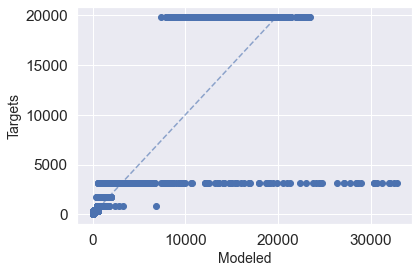

In [9]:
ut.one_to_one_match_plot(df_model)

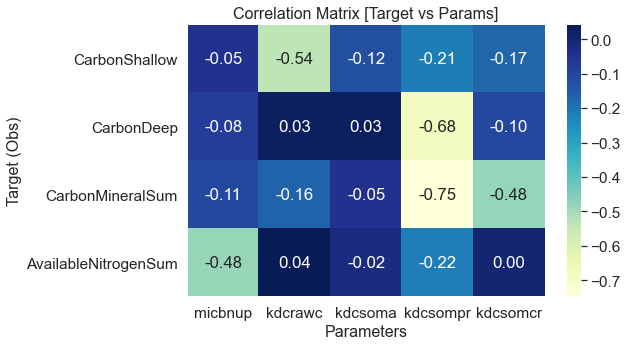

In [10]:
corr_mp=ut.get_output_param_corr(df_param,df_model.iloc[:,24:28],(8,5))

## SA STEP4 SoilC (bound) kdcsomcr-kdcsompr-fixed

In [11]:
[df_param,df_model]=get_sa_data_soilc_all('data/sa-step4-md1-soil-099-kdcsomcr-kdcsompr-fixed/')

In [12]:
cat data/sa-step4-md1-soil-099-kdcsomcr-kdcsompr-fixed/param_props.csv

name,bounds,initial,cmtnum,pftnum
micbnup,"[0.004495000000000027, 0.894505]",0.4495,1,None
kdcrawc,"[0.006340000000000012, 1.26166]",0.634,1,None
kdcsoma,"[0.00539999999999996, 1.0746000000000002]",0.54,1,None
kdcsompr,"[0.0005, 0.002]",0.002,1,None
kdcsomcr,"[1.75e-05, 9e-05]",7e-05,1,None


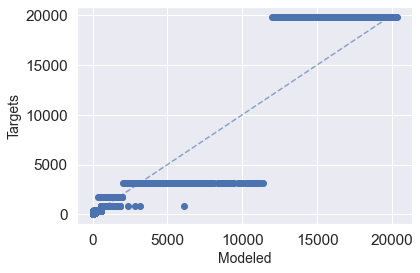

In [13]:
ut.one_to_one_match_plot(df_model)

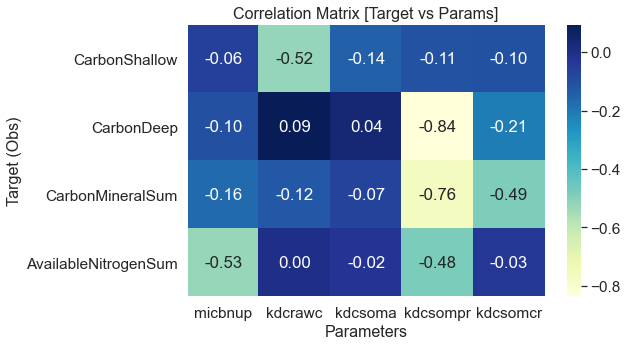

In [14]:
corr_mp=ut.get_output_param_corr(df_param,df_model.iloc[:,24:28],(8,5))

## SA STEP4 SoilC (bound)

In [15]:
[df_param,df_model]=get_sa_data_soilc_all('data/STEP4-MD1-NPPVEGCVEGN-soil-bounds/')

In [16]:
!cat data/STEP4-MD1-NPPVEGCVEGN-soil-bounds/param_props.csv

name,bounds,initial,cmtnum,pftnum
micbnup,"[0.1, 2.0]",0.4495,1,None
kdcrawc,"[0.6, 0.99]",0.634,1,None
kdcsoma,"[0.1, 0.6]",0.54,1,None
kdcsompr,"[0.001, 0.1]",0.002,1,None
kdcsomcr,"[1e-07, 0.001]",7e-05,1,None


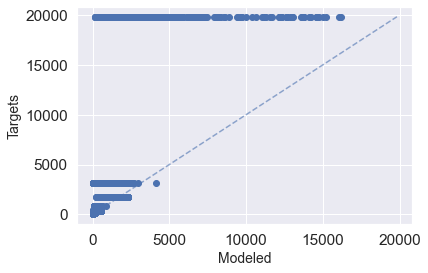

In [17]:
ut.one_to_one_match_plot(df_model)

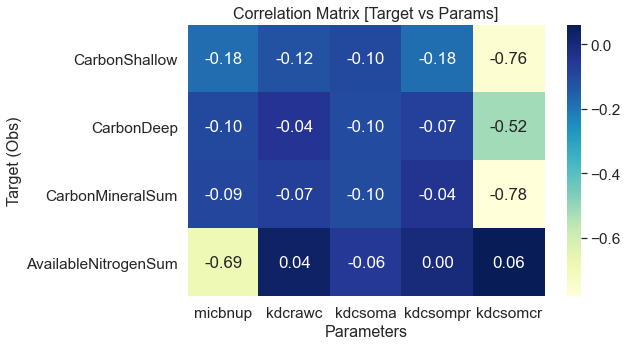

In [18]:
corr_mp=ut.get_output_param_corr(df_param,df_model.iloc[:,24:28],(8,5))

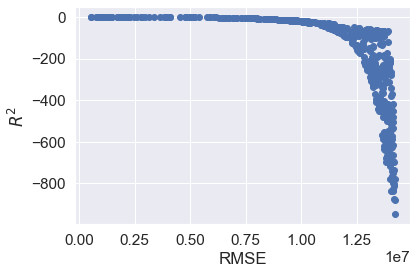

In [19]:
ut.plot_r2_rmse(df_model)

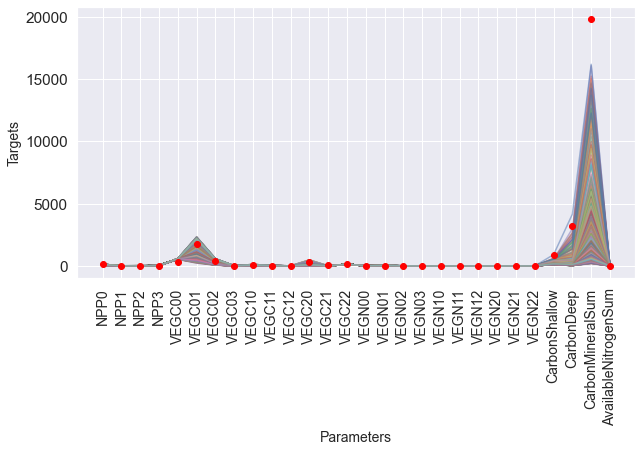

In [20]:
ut.spaghetti_match_plot(df_param,df_model)
#ut.spaghetti_match_plot(df_param,df_model,logy=True)

In [21]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.8)
xparams[xparams.MAPE<1]


,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,$R^2$,RMSE,MAPE
14,0.125345,0.942582,0.302822,0.091488,0.000001,0.942753,515470.770848,0.900292
283,0.377467,0.757151,0.213743,0.026668,0.000006,0.904427,771077.996293,0.810143


In [22]:
xparams.describe()

,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,$R^2$,RMSE,MAPE
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000
mean,0.861249,0.781911,0.268459,0.051937,0.000017,0.880877,8.995123e+05,1.986134
std,0.416584,0.098294,0.083959,0.032489,0.000025,0.040734,2.405599e+05,0.835393
min,0.125345,0.605030,0.162630,0.001006,0.000001,0.823971,5.149626e+05,0.810143
25%,0.579876,0.736144,0.214923,0.029962,0.000005,0.861495,7.887258e+05,1.287465
50%,0.950798,0.781532,0.269087,0.057527,0.000010,0.869743,9.750596e+05,2.233882
75%,1.099839,0.825460,0.296472,0.078161,0.000015,0.901559,1.020074e+06,2.366870
max,1.431923,0.942582,0.434865,0.091688,0.000087,0.944957,1.214113e+06,3.282091


In [23]:
#ut.plot_hist_dist(xparams)

##  Calibration (setup similar to the SA 0.75 and bound)

In [30]:
path='data/calib-step4-md1/' #10% variance
params='param_step4-md1.csv'
model='out_step4-md1.csv'
df_model = pd.read_csv(path+model,header=None)

output_name = ['NPP0','NPP1','NPP2','NPP3',\
              'VEGC00','VEGC01','VEGC02','VEGC03','VEGC10','VEGC11','VEGC12',\
              'VEGC20','VEGC21','VEGC22', \
              'VEGN00','VEGN01','VEGN02','VEGN03','VEGN10','VEGN11','VEGN12',\
              'VEGN20','VEGN21','VEGN22', 'CarbonShallow', 'CarbonDeep', \
              'CarbonMineralSum', 'AvailableNitrogenSum']
df_model.columns = output_name

df_param = pd.read_csv(path+params,header=None)
output_name = ['micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr']
df_param.columns = output_name
df_model.head()
df_model.shape

(9, 28)

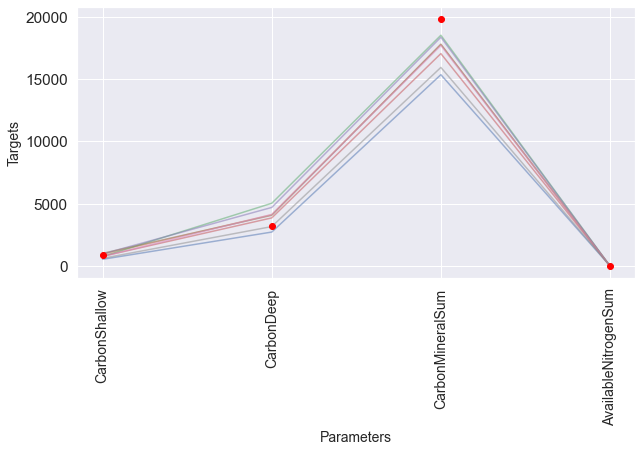

In [31]:
ut.spaghetti_match_plot(df_param,df_model.iloc[:,24:28])
#ut.spaghetti_match_plot(df_param,df_model,logy=True)

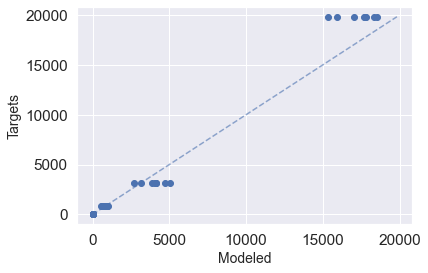

In [32]:
ut.one_to_one_match_plot(df_model.iloc[:,24:28])

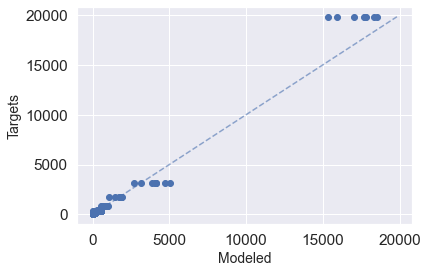

In [26]:
ut.one_to_one_match_plot(df_model)

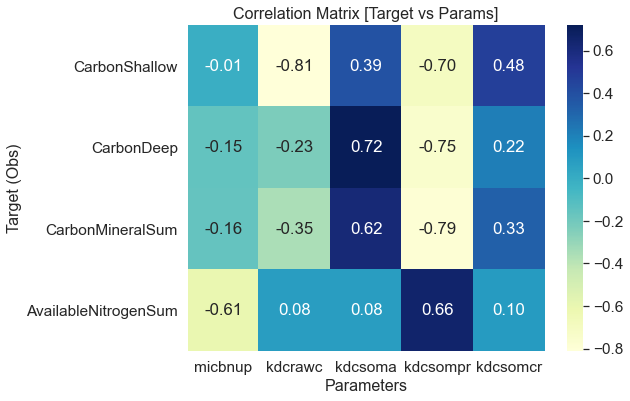

In [27]:
corr_mp=ut.get_output_param_corr(df_param,df_model.iloc[:,24:28],(8,6))

In [28]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.9)
xparams[xparams.MAPE<1]

,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,$R^2$,RMSE,MAPE
0,0.260246,0.899366,0.100026,0.037541,6.660000e-06,0.910662,731950.819195,0.627169
2,0.137975,0.977740,0.599765,0.001580,5.700000e-07,0.984641,189061.215291,0.862344
6,0.167420,1.046672,0.154970,0.001767,1.866000e-05,0.981774,201711.531414,0.982543
7,0.320818,0.891747,0.161359,0.007205,5.000000e-07,0.938280,547844.899971,0.803495
